In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [39]:
import warnings
warnings.filterwarnings('ignore')

## Read and explore data

In [40]:
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Missing values : 
- Fill missing values in Age column with Median Imputation 
- Fill missing categorical values in Embarked column with Mode Imputation (the most frequent category)
- Drop Cabin column since it has so many missing values

In [46]:
print(df['Age'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
print(df['Age'].median())

28.0
28.0


In [47]:
print(df['Embarked'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df['Embarked'].mode()[0])

S
S


In [48]:
df = df.drop(columns = 'Cabin')

In [49]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [50]:
#check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Data preprocessing  and cleaning

In [52]:
#Convert nominal data
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked']) #order is not important

In [53]:
df['Embarked_C'] = df['Embarked_C'].map({False: 0, True: 1})
df['Embarked_Q'] = df['Embarked_Q'].map({False: 0, True: 1})
df['Embarked_S'] = df['Embarked_S'].map({False: 0, True: 1})

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1


In [55]:
#drop less meaningfull columns : name, id, ticket
df = df.drop(columns= ['PassengerId','Name','Ticket'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


# Visualize data

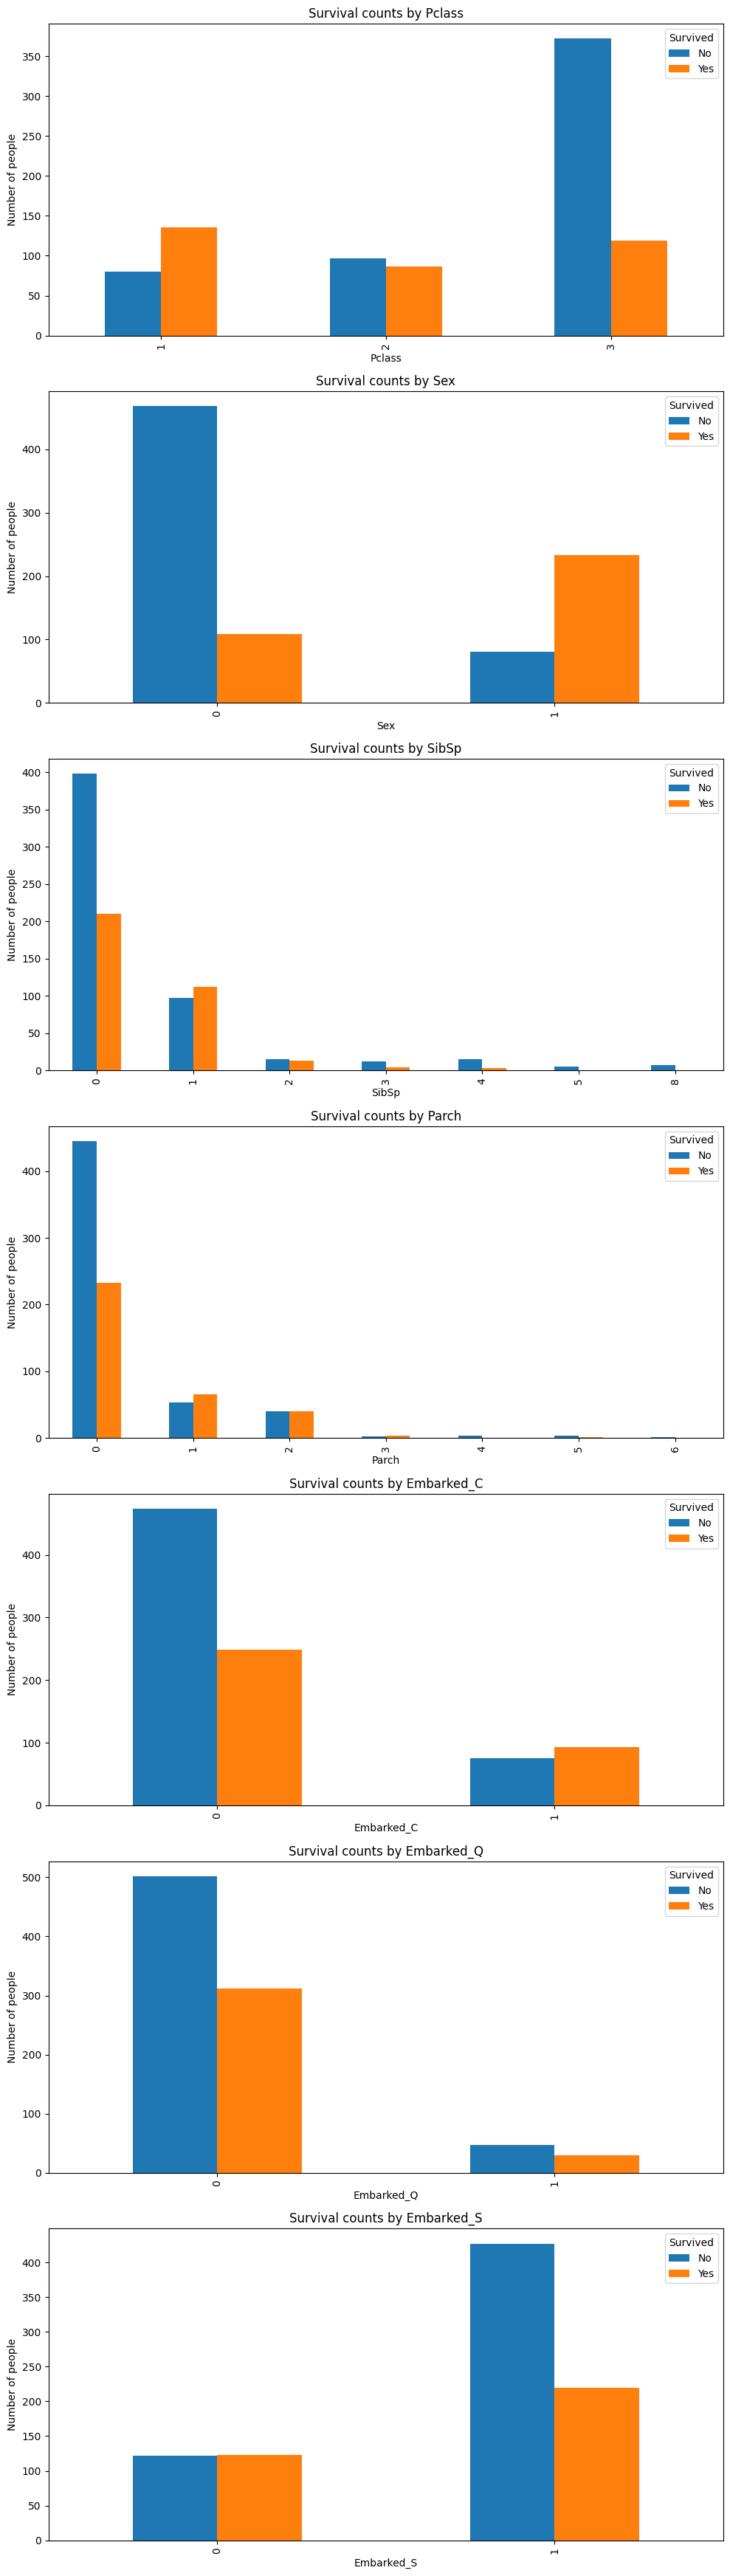

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


columns_to_plot = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, len(columns_to_plot) * 5))

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    # Group by the column and 'Survived', then count the occurrences
    grouped_data = df.groupby([column, 'Survived']).size().unstack().fillna(0)
    # Plot the grouped data
    grouped_data.plot(kind='bar', ax=ax)
    ax.set_title(f'Survival counts by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Number of people')
    ax.legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


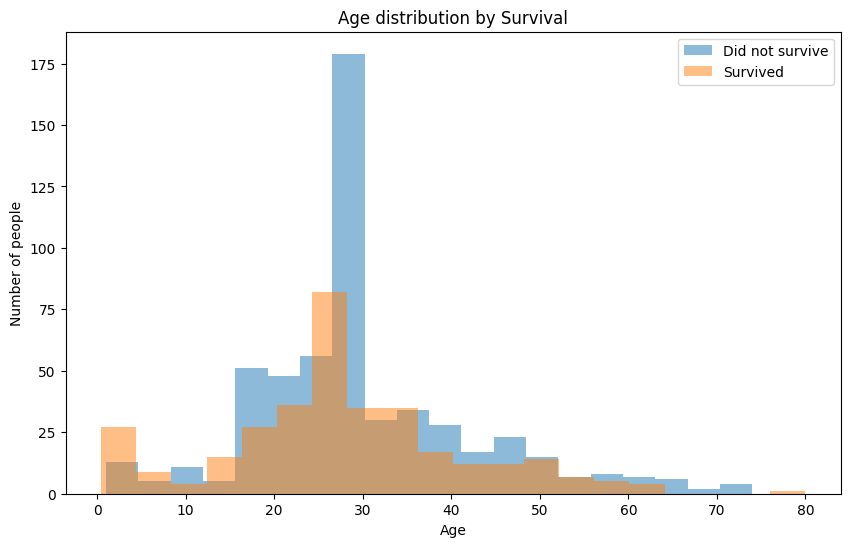

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


plt.hist(df[df['Survived'] == 0]['Age'], bins=20, alpha=0.5, label='Did not survive')

plt.hist(df[df['Survived'] == 1]['Age'], bins=20, alpha=0.5, label='Survived')

plt.title('Age distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.legend()
plt.show()


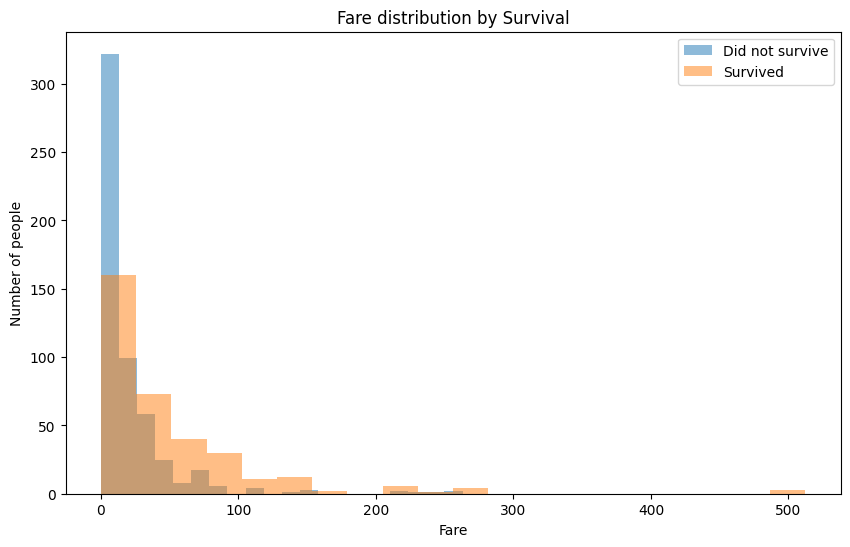

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


plt.hist(df[df['Survived'] == 0]['Fare'], bins=20, alpha=0.5, label='Did not survive')

plt.hist(df[df['Survived'] == 1]['Fare'], bins=20, alpha=0.5, label='Survived')

plt.title('Fare distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Number of people')
plt.legend()
plt.show()


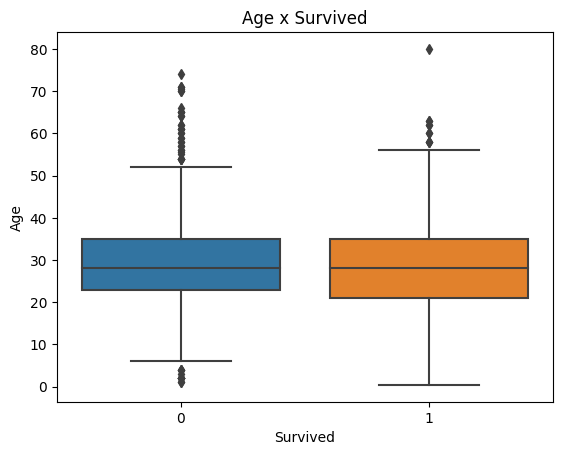

In [59]:
import seaborn as sns
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age x Survived')
plt.show()

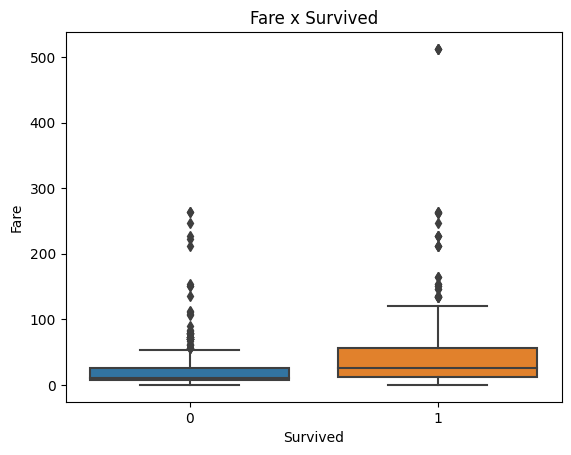

In [60]:
import seaborn as sns
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare x Survived')
plt.show()

## Standardizing Age and Fare to improve the performance of classification algorithms

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [62]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,1,0,-0.502445,0,0,1
1,1,1,1,0.663861,1,0,0.786845,1,0,0
2,1,3,1,-0.258337,0,0,-0.488854,0,0,1
3,1,1,1,0.433312,1,0,0.420730,0,0,1
4,0,3,0,0.433312,0,0,-0.486337,0,0,1


## Correlation matrix

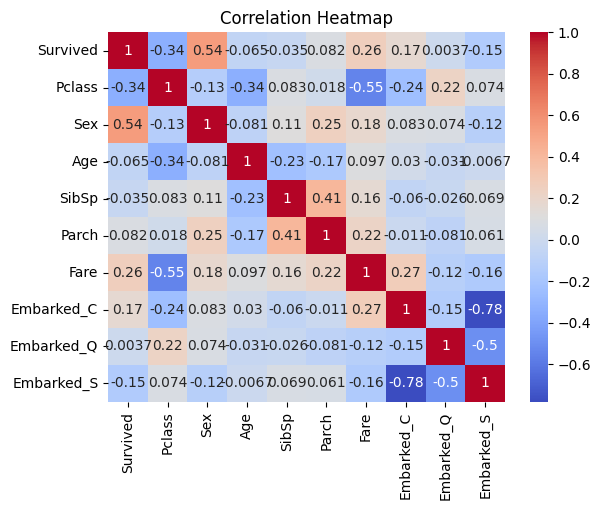

In [63]:
import seaborn as sns

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [64]:
corr_matrix['Survived']

Survived      1.000000
Pclass       -0.338481
Sex           0.543351
Age          -0.064910
SibSp        -0.035322
Parch         0.081629
Fare          0.257307
Embarked_C    0.168240
Embarked_Q    0.003650
Embarked_S   -0.149683
Name: Survived, dtype: float64

In [65]:
corr_matrix['Survived'].abs().sort_values(ascending=False)

Survived      1.000000
Sex           0.543351
Pclass        0.338481
Fare          0.257307
Embarked_C    0.168240
Embarked_S    0.149683
Parch         0.081629
Age           0.064910
SibSp         0.035322
Embarked_Q    0.003650
Name: Survived, dtype: float64

## Split data

In [66]:
from sklearn.model_selection import train_test_split

y = df['Survived']
X = df.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (712, 9)
X_test shape: (179, 9)
y_train shape: (712,)
y_test shape: (179,)


## Train and predict
- using different classifiers

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [69]:
# init models:
RF = RandomForestClassifier(random_state=42)
DT = DecisionTreeClassifier(random_state=42)
KNN = KNeighborsClassifier()
NB = GaussianNB()
SVM = SVC()

In [70]:
results = {}

In [71]:
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results['RF']={
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

print(results['RF'])

{'Accuracy': 0.8100558659217877, 'Precision': 0.7702702702702703, 'Recall': 0.7702702702702703, 'F1 Score': 0.7702702702702703}


In [72]:
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results['DT']={
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

print(results['DT'])

{'Accuracy': 0.7821229050279329, 'Precision': 0.7272727272727273, 'Recall': 0.7567567567567568, 'F1 Score': 0.7417218543046358}


In [73]:
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results['KNN']={
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

print(results['KNN'])

{'Accuracy': 0.8100558659217877, 'Precision': 0.7777777777777778, 'Recall': 0.7567567567567568, 'F1 Score': 0.7671232876712328}


In [74]:
NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results['NB']={
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

print(results['NB'])

{'Accuracy': 0.770949720670391, 'Precision': 0.7037037037037037, 'Recall': 0.7702702702702703, 'F1 Score': 0.735483870967742}


In [75]:
SVM.fit(X_train, y_train)

y_pred = SVM.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results['SVM']={
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

print(results['SVM'])

{'Accuracy': 0.8156424581005587, 'Precision': 0.8059701492537313, 'Recall': 0.7297297297297297, 'F1 Score': 0.7659574468085106}


## Summuary

In [77]:
results

{'RF': {'Accuracy': 0.8100558659217877,
  'Precision': 0.7702702702702703,
  'Recall': 0.7702702702702703,
  'F1 Score': 0.7702702702702703},
 'DT': {'Accuracy': 0.7821229050279329,
  'Precision': 0.7272727272727273,
  'Recall': 0.7567567567567568,
  'F1 Score': 0.7417218543046358},
 'KNN': {'Accuracy': 0.8100558659217877,
  'Precision': 0.7777777777777778,
  'Recall': 0.7567567567567568,
  'F1 Score': 0.7671232876712328},
 'NB': {'Accuracy': 0.770949720670391,
  'Precision': 0.7037037037037037,
  'Recall': 0.7702702702702703,
  'F1 Score': 0.735483870967742},
 'SVM': {'Accuracy': 0.8156424581005587,
  'Precision': 0.8059701492537313,
  'Recall': 0.7297297297297297,
  'F1 Score': 0.7659574468085106}}

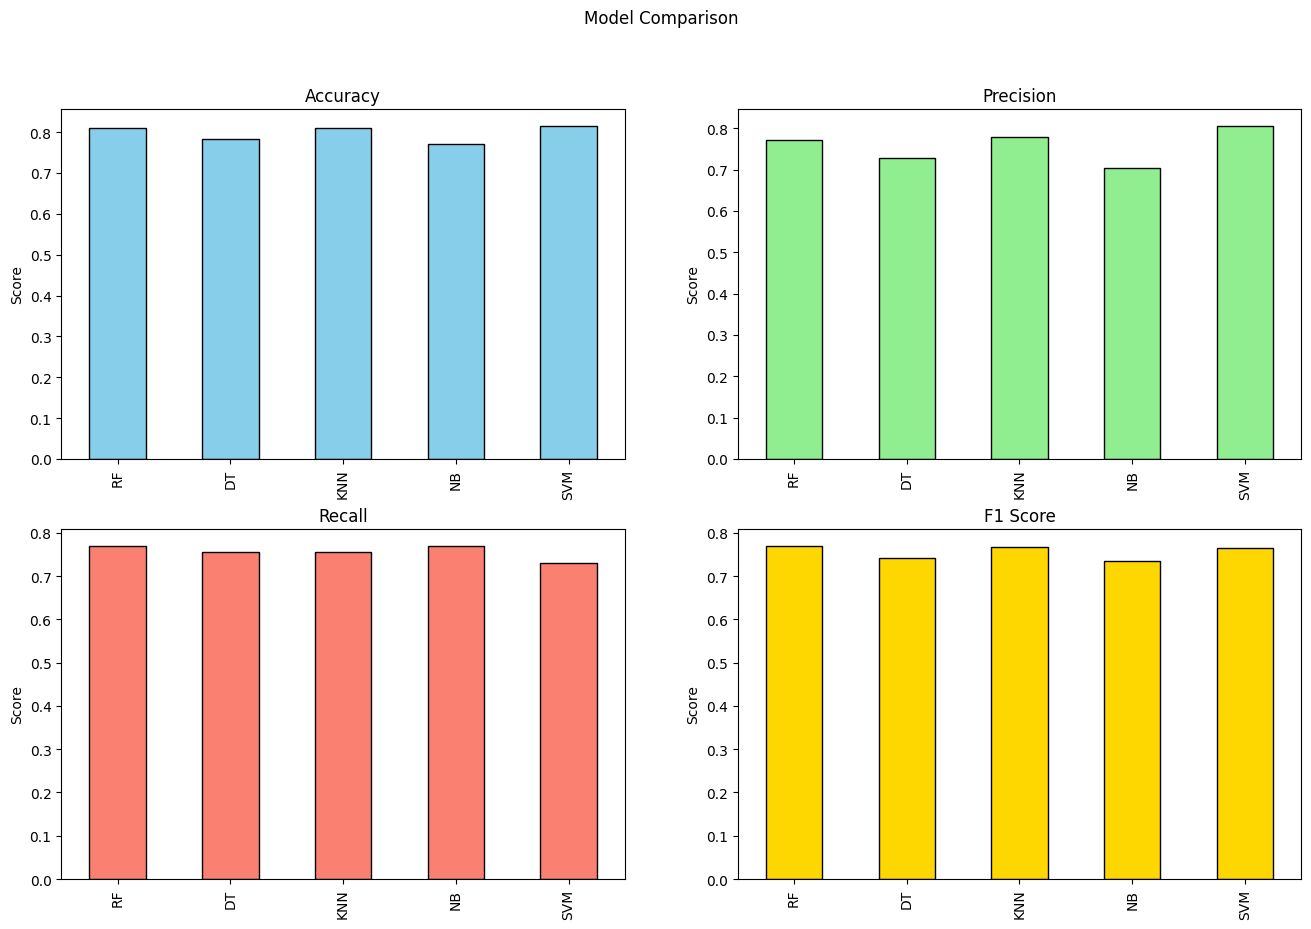

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.DataFrame(results).T

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Model Comparison')

# Accuracy
results_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylabel('Score')

# Precision
results_df['Precision'].plot(kind='bar', ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylabel('Score')

# Recall
results_df['Recall'].plot(kind='bar', ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylabel('Score')

# F1 Score
results_df['F1 Score'].plot(kind='bar', ax=axes[1, 1], color='gold', edgecolor='black')
axes[1, 1].set_title('F1 Score')
axes[1, 1].set_ylabel('Score')



plt.show()
